In [91]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn as nn


In [92]:
seed = 42
torch.cuda.manual_seed_all(seed)
device = "cuda" if torch.cuda.is_available() else "cpu"

In [93]:
X,y  = make_blobs(n_samples=1000,centers=4,cluster_std=1.5,random_state=seed)


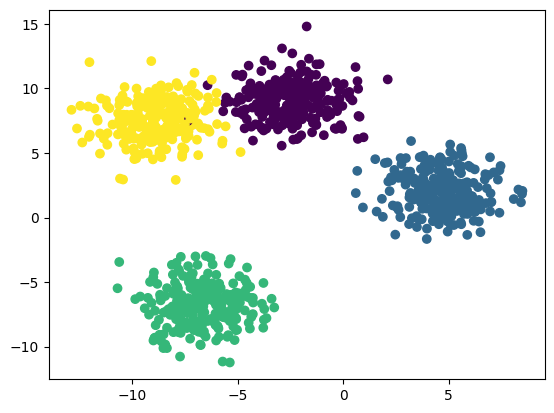

In [94]:
plt.scatter(X[:,0],X[:,1],c=y)

In [95]:
X= torch.tensor(X,device=device,dtype=torch.float32)
y= torch.tensor(y,device=device,dtype=torch.long)

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [97]:
X_train.shape

torch.Size([800, 2])

In [98]:
class Classification(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer=nn.Sequential(
            nn.Linear(in_features=2,out_features=16),
            # nn.ReLU(),
            nn.Linear(in_features=16,out_features=32),
            # nn.ReLU(),
            nn.Linear(in_features=32,out_features=4),
            nn.Softmax(dim=1)
            
        )
    
    def forward(self,x):
        return self.layer(x)

In [99]:
model = Classification().to(device=device)

In [100]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

In [101]:
epochs =100
loss_list=[]
val_loss_list=[]
for i in range(epochs):
    model.train()

    y_pred=model(X_train)
    loss = loss_fn(y_pred,y_train)

    loss_list.append(loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        y_pred=model(X_test)
        val_loss = loss_fn(y_pred,y_test)

        val_loss_list.append(val_loss.item())
        


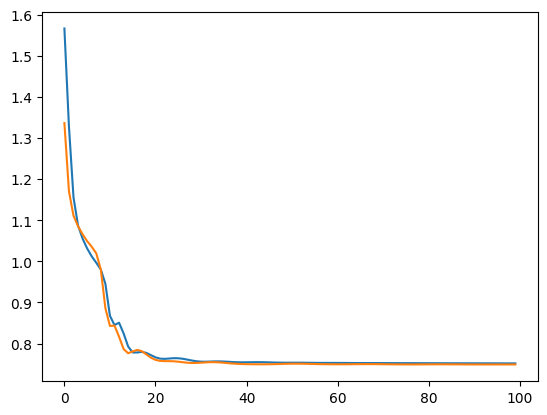

In [102]:
plt.plot(loss_list)
plt.plot(val_loss_list)

In [103]:
with torch.inference_mode():
        y_pred=model(X_test)

        

In [104]:
torch.argmax(y_pred[:5],dim=1)

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [105]:
y_test[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [106]:
y_pred=torch.argmax(y_pred,dim=1)

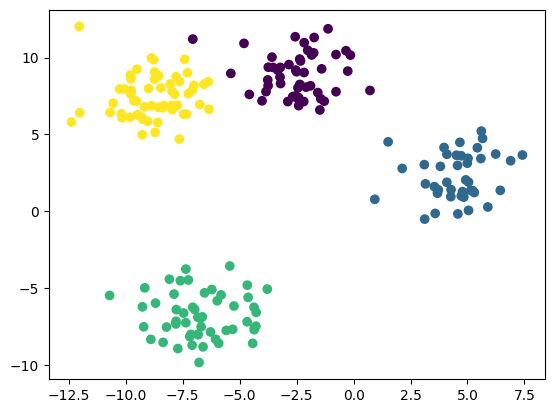

In [107]:
plt.scatter(X_test[:,0].cpu(),X_test[:,1].cpu(),c=y_pred.cpu())

In [114]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [121]:
print(accuracy_score(y_test.cpu(),y_pred.cpu()))
print(precision_score(y_test.cpu(),y_pred.cpu(),average='weighted'))
print(recall_score(y_test.cpu(),y_pred.cpu(),average='weighted'))
print(f1_score(y_test.cpu(),y_pred.cpu(),average='weighted'))

0.995
0.9950999999999999
0.995
0.9950031286314472


In [108]:
from helper_function import plot_decision_boundary

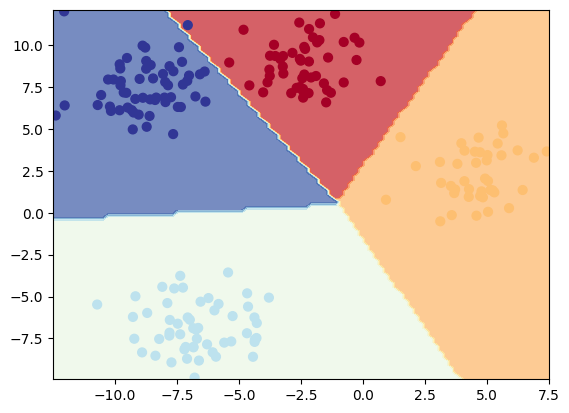

In [109]:
plot_decision_boundary(model,X_test,y_test)

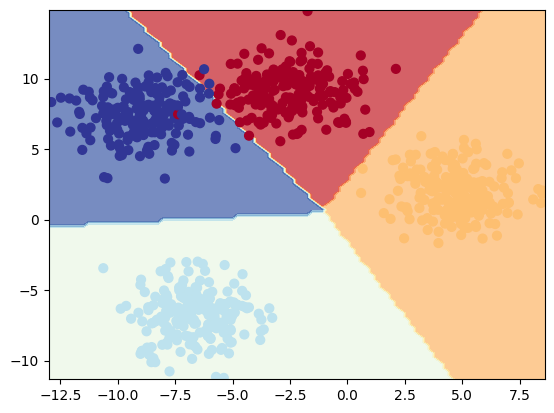

In [110]:
plot_decision_boundary(model,X_train,y_train)